<a href="https://colab.research.google.com/github/anchalchepurwar/DL_practicals/blob/main/DL_pr1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# data loading
# data preproccessing use normalization splitting of data
# ML model design using keras and tensorflow
# 3 dense layer[in each dence layer there will be activation function] assign values
# compile model witgh adam optimizer
# categorical loss cross entropy
# train the model
# evaluate the model
# predict the model

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Iris (1).csv to Iris (1).csv


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print("TensorFlow version:", tf.__version__)
print("Libraries imported successfully!")


TensorFlow version: 2.18.0
Libraries imported successfully!


In [9]:
# Step 2: Data Loading
print("\n" + "="*50)
print("STEP 2: DATA LOADING")
print("="*50)




STEP 2: DATA LOADING


In [10]:
try:
    df = pd.read_csv('Iris (1).csv')
    print("CSV file loaded successfully!")
except FileNotFoundError:
    print("Error: 'Iris (1).csv' not found. Please upload the file to Colab.")
    print("Go to Files panel (folder icon) and drag your CSV file there.")
    raise

print(f"Dataset shape: {df.shape}")
print("\nColumn names:")
print(df.columns.tolist())
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset info:")
print(df.info())

CSV file loaded successfully!
Dataset shape: (150, 6)

Column names:
['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

First 5 rows:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-nul

In [11]:
feature_columns = df.columns[:-1].tolist()
target_column = df.columns[-1]

print(f"\nFeature columns: {feature_columns}")
print(f"Target column: {target_column}")

# Check unique values in target column
print(f"\nUnique species in dataset:")
print(df[target_column].unique())
print(f"\nClass distribution:")
print(df[target_column].value_counts())

# Extract features and target
X = df[feature_columns].values
species_names = df[target_column].unique()

# Encode target labels to numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df[target_column])

print(f"\nLabel encoding:")
for i, species in enumerate(label_encoder.classes_):
    print(f"{species} -> {i}")


Feature columns: ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
Target column: Species

Unique species in dataset:
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']

Class distribution:
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Label encoding:
Iris-setosa -> 0
Iris-versicolor -> 1
Iris-virginica -> 2


In [5]:
# Load the dataset
df = pd.read_csv('Iris (1).csv')

# Drop the 'Id' column as it is not needed for classification
df = df.drop('Id', axis=1)

# Convert the species column to numerical labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

# Separate features (X) and target (y)
X = df.drop('Species', axis=1)
y = df['Species']

# Normalize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data loading and preprocessing complete.")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

Data loading and preprocessing complete.
X_train shape: (120, 4)
y_train shape: (120,)
X_test shape: (30, 4)
y_test shape: (30,)


In [12]:
# ML model design using keras and tensorflow
# Add encoded target to dataframe for visualization
df['species_encoded'] = y

# Step 3: Data Preprocessing
print("\n" + "="*50)
print("STEP 3: DATA PREPROCESSING")
print("="*50)

# Check for missing values
print("Missing values:")
print(df.isnull().sum())

# Statistical summary
print("\nStatistical summary:")
print(df.describe())

# Visualize the data
plt.figure(figsize=(15, 10))


STEP 3: DATA PREPROCESSING
Missing values:
Id                 0
SepalLengthCm      0
SepalWidthCm       0
PetalLengthCm      0
PetalWidthCm       0
Species            0
species_encoded    0
dtype: int64

Statistical summary:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
count  150.000000     150.000000    150.000000     150.000000    150.000000   
mean    75.500000       5.843333      3.054000       3.758667      1.198667   
std     43.445368       0.828066      0.433594       1.764420      0.763161   
min      1.000000       4.300000      2.000000       1.000000      0.100000   
25%     38.250000       5.100000      2.800000       1.600000      0.300000   
50%     75.500000       5.800000      3.000000       4.350000      1.300000   
75%    112.750000       6.400000      3.300000       5.100000      1.800000   
max    150.000000       7.900000      4.400000       6.900000      2.500000   

       species_encoded  
count       150.000000  
mean        

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

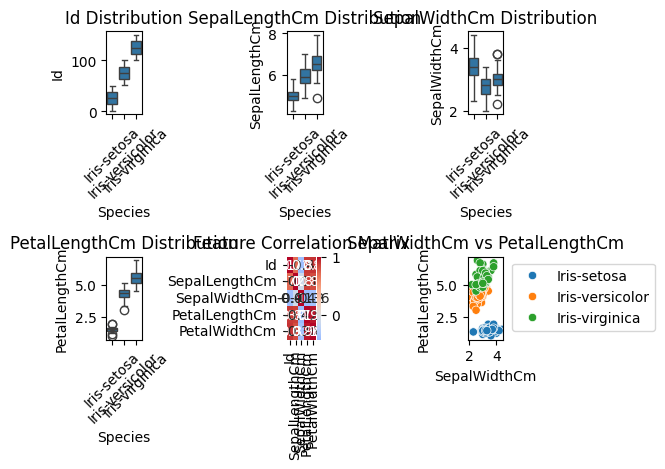

In [13]:
if len(feature_columns) >= 4:
    plt.subplot(2, 3, 1)
    sns.boxplot(data=df, x=target_column, y=feature_columns[0])
    plt.title(f'{feature_columns[0]} Distribution')
    plt.xticks(rotation=45)

    plt.subplot(2, 3, 2)
    sns.boxplot(data=df, x=target_column, y=feature_columns[1])
    plt.title(f'{feature_columns[1]} Distribution')
    plt.xticks(rotation=45)

    plt.subplot(2, 3, 3)
    sns.boxplot(data=df, x=target_column, y=feature_columns[2])
    plt.title(f'{feature_columns[2]} Distribution')
    plt.xticks(rotation=45)

    plt.subplot(2, 3, 4)
    sns.boxplot(data=df, x=target_column, y=feature_columns[3])
    plt.title(f'{feature_columns[3]} Distribution')
    plt.xticks(rotation=45)

    plt.subplot(2, 3, 5)
    correlation_matrix = df[feature_columns].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Feature Correlation Matrix')

    plt.subplot(2, 3, 6)
    sns.scatterplot(data=df, x=feature_columns[2], y=feature_columns[3], hue=target_column)
    plt.title(f'{feature_columns[2]} vs {feature_columns[3]}')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [14]:
# Normalization using StandardScaler
print("\nNormalizing features...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Original feature means:")
print(np.mean(X, axis=0))
print("Normalized feature means:")
print(np.mean(X_scaled, axis=0))
print("Normalized feature standard deviations:")
print(np.std(X_scaled, axis=0))

# Convert target to categorical (one-hot encoding)
num_classes = len(np.unique(y))
y_categorical = to_categorical(y, num_classes=num_classes)
print(f"\nOriginal target shape: {y.shape}")
print(f"Number of classes: {num_classes}")
print(f"Categorical target shape: {y_categorical.shape}")
print("First 5 categorical targets:")
print(y_categorical[:5])

# Step 4: Data Splitting
print("\n" + "="*50)
print("STEP 4: DATA SPLITTING")
print("="*50)

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_categorical,
    test_size=0.2,
    random_state=42,
    stratify=y  # Ensure balanced split
)

print(f"Training set shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing set shape: X_test: {X_test.shape}, y_test: {y_test.shape}")

# Verify class distribution in splits
y_train_classes = np.argmax(y_train, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

print("\nTraining set class distribution:")
unique, counts = np.unique(y_train_classes, return_counts=True)
for i, count in zip(unique, counts):
    print(f"Class {label_encoder.classes_[i]}: {count}")

print("\nTesting set class distribution:")
unique, counts = np.unique(y_test_classes, return_counts=True)
for i, count in zip(unique, counts):
    print(f"Class {label_encoder.classes_[i]}: {count}")

# Step 5: ML Model Design
print("\n" + "="*50)
print("STEP 5: MODEL DESIGN")
print("="*50)



Normalizing features...
Original feature means:
[75.5         5.84333333  3.054       3.75866667  1.19866667]
Normalized feature means:
[ 0.00000000e+00 -4.73695157e-16 -6.63173220e-16  3.31586610e-16
 -2.84217094e-16]
Normalized feature standard deviations:
[1. 1. 1. 1. 1.]

Original target shape: (150,)
Number of classes: 3
Categorical target shape: (150, 3)
First 5 categorical targets:
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]

STEP 4: DATA SPLITTING
Training set shape: X_train: (120, 5), y_train: (120, 3)
Testing set shape: X_test: (30, 5), y_test: (30, 3)

Training set class distribution:
Class Iris-setosa: 40
Class Iris-versicolor: 40
Class Iris-virginica: 40

Testing set class distribution:
Class Iris-setosa: 10
Class Iris-versicolor: 10
Class Iris-virginica: 10

STEP 5: MODEL DESIGN


In [16]:

num_features = X.shape[1]
model = keras.Sequential([
    # Input layer (automatically inferred from first dense layer)
    # First hidden layer - 64 neurons with ReLU activation
    layers.Dense(64, activation='relu', input_shape=(num_features,), name='hidden_layer_1'),
    layers.Dropout(0.2),  # Dropout for regularization

    # Second hidden layer - 32 neurons with ReLU activation
    layers.Dense(32, activation='relu', name='hidden_layer_2'),
    layers.Dropout(0.2),

    # Third hidden layer - 16 neurons with ReLU activation
    layers.Dense(16, activation='relu', name='hidden_layer_3'),

    # Output layer - neurons equal to number of classes with softmax activation
    layers.Dense(num_classes, activation='softmax', name='output_layer')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# Display model architecture
print("Model Architecture:")
model.summary()

# Visualize model architecture
keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

# Step 6: Model Compilation
print("\n" + "="*50)
print("STEP 6: MODEL COMPILATION")
print("="*50)

# Compile the model
model.compile(
    optimizer='adam',  # Adam optimizer
    loss='categorical_crossentropy',  # Categorical crossentropy for multi-class classification
    metrics=['accuracy']
)

print("Model compiled successfully!")
print("Optimizer: Adam")
print("Loss function: Categorical Crossentropy")
print("Metrics: Accuracy")

# Step 7: Model Training
print("\n" + "="*50)
print("STEP 7: MODEL TRAINING")
print("="*50)


Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 64)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,043 (11.89 KB)

 Trainable params: 3,043 (11.89 KB)

 Non-trainable params: 0 (0.00 B)


STEP 6: MODEL COMPILATION
Model compiled successfully!
Optimizer: Adam
Loss function: Categorical Crossentropy
Metrics: Accuracy

STEP 7: MODEL TRAINING


Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.2740 - loss: 1.1674 - val_accuracy: 0.2500 - val_loss: 1.0842
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3457 - loss: 1.0687 - val_accuracy: 0.2500 - val_loss: 1.0078
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4146 - loss: 0.9525 - val_accuracy: 0.5000 - val_loss: 0.9323
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5853 - loss: 0.9068 - val_accuracy: 0.5833 - val_loss: 0.8647
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7759 - loss: 0.8330 - val_accuracy: 0.6250 - val_loss: 0.8036
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7682 - loss: 0.7364 - val_accuracy: 0.6250 - val_loss: 0.7421
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8479 - loss: 0.6796 - val_accuracy: 0.6250 - val_loss: 0.6832
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8305 - loss: 0.6135 - val_accuracy: 0.6667 - val_loss:

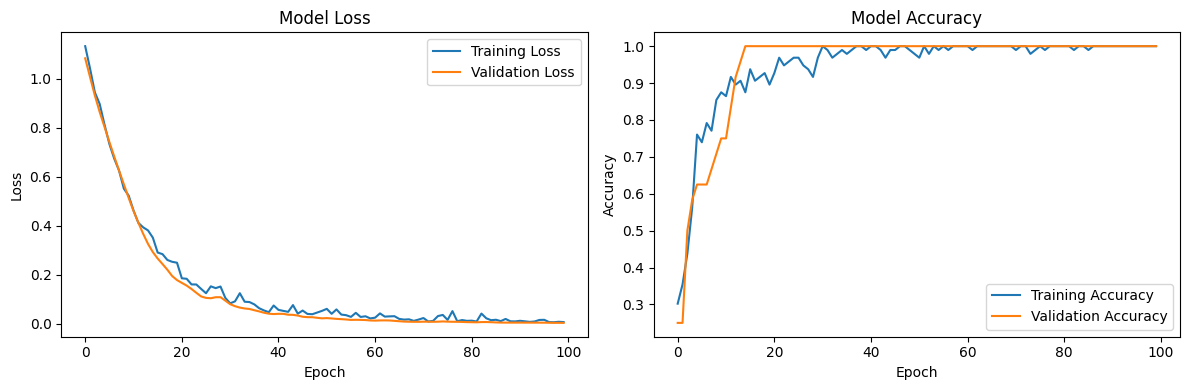


STEP 8: MODEL EVALUATION
Test Accuracy: 1.0000
Test Loss: 0.0013
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



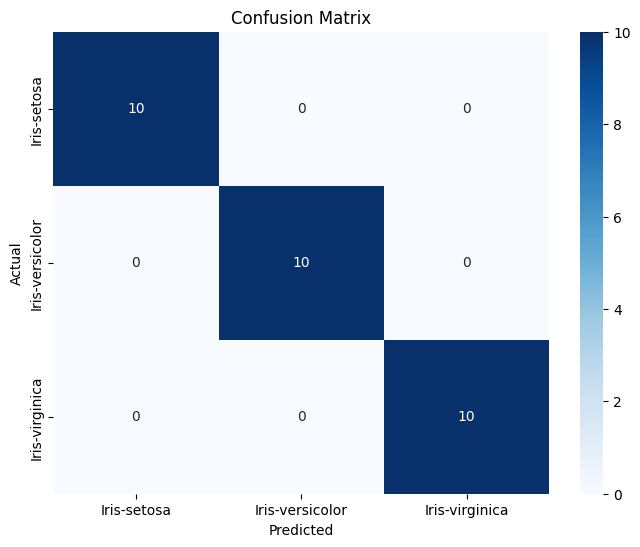


Accuracy Score: 1.0000

STEP 9: MODEL PREDICTIONS
Sample Predictions:

Sample 1 (Row 1):
Features: [-1.72054204 -0.90068117  1.03205722 -1.3412724  -1.31297673]
Actual class: Iris-setosa
Predicted class: Iris-setosa
Prediction probabilities:
  Iris-setosa: 1.0000
  Iris-versicolor: 0.0000
  Iris-virginica: 0.0000

Sample 2 (Row 51):
Features: [-0.56581584  1.40150837  0.33784833  0.53529583  0.26469891]
Actual class: Iris-versicolor
Predicted class: Iris-versicolor
Prediction probabilities:
  Iris-setosa: 0.0001
  Iris-versicolor: 0.9998
  Iris-virginica: 0.0001

Sample 3 (Row 101):
Features: [0.58891036 0.55333328 0.56925129 1.27454998 1.71090158]
Actual class: Iris-virginica
Predicted class: Iris-virginica
Prediction probabilities:
  Iris-setosa: 0.0000
  Iris-versicolor: 0.0000
  Iris-virginica: 1.0000

EXAMPLE PREDICTION ON NEW DATA
Feature columns: ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
Example values: [np.int64(1), np.float64(5.1), np.float64(3.

In [18]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.2,  # Use 20% of training data for validation
    verbose=1,
    shuffle=True
)

print("Model training completed!")

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Step 8: Model Evaluation
print("\n" + "="*50)
print("STEP 8: MODEL EVALUATION")
print("="*50)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Make predictions
y_pred_proba = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_proba, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes,
                          target_names=label_encoder.classes_))

# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(f"\nAccuracy Score: {accuracy_score(y_true_classes, y_pred_classes):.4f}")

# Step 9: Model Predictions
print("\n" + "="*50)
print("STEP 9: MODEL PREDICTIONS")
print("="*50)

# Make predictions on some sample data
print("Sample Predictions:")
sample_indices = [0, len(df)//3, 2*len(df)//3]  # Sample from different parts of dataset
for idx, i in enumerate(sample_indices):
    if i < len(X_scaled):
        sample_features = X_scaled[i:i+1]
        prediction_proba = model.predict(sample_features, verbose=0)
        predicted_class = np.argmax(prediction_proba)
        actual_class = y[i]

        print(f"\nSample {idx+1} (Row {i+1}):")
        print(f"Features: {sample_features[0]}")
        print(f"Actual class: {label_encoder.classes_[actual_class]}")
        print(f"Predicted class: {label_encoder.classes_[predicted_class]}")
        print(f"Prediction probabilities:")
        for j, prob in enumerate(prediction_proba[0]):
            print(f"  {label_encoder.classes_[j]}: {prob:.4f}")

# Create a function for making predictions on new data
def predict_iris_species(*feature_values):
    """
    Predict iris species based on flower measurements
    Takes feature values as arguments in the same order as the dataset columns
    """
    if len(feature_values) != len(feature_columns):
        raise ValueError(f"Expected {len(feature_columns)} features, got {len(feature_values)}")

    # Create feature array
    features = np.array([list(feature_values)])

    # Scale the features using the same scaler used for training
    features_scaled = scaler.transform(features)

    # Make prediction
    prediction_proba = model.predict(features_scaled, verbose=0)
    predicted_class = np.argmax(prediction_proba)

    return {
        'predicted_species': label_encoder.classes_[predicted_class],
        'probabilities': {
            label_encoder.classes_[i]: prob
            for i, prob in enumerate(prediction_proba[0])
        }
    }

# Example usage of the prediction function
print("\n" + "="*50)
print("EXAMPLE PREDICTION ON NEW DATA")
print("="*50)

# Use actual feature values from the dataset for demonstration
if len(df) > 0:
    example_row = df.iloc[0]
    example_features = [example_row[col] for col in feature_columns]

    print(f"Feature columns: {feature_columns}")
    print(f"Example values: {example_features}")

    example_result = predict_iris_species(*example_features)
    print(f"\nExample prediction for flower {example_features}:")
    print(f"Predicted species: {example_result['predicted_species']}")
    print("Probabilities:")
    for species, prob in example_result['probabilities'].items():
        print(f"  {species}: {prob:.4f}")

print("\n" + "="*50)
print("MODEL TRAINING AND EVALUATION COMPLETED!")
print("="*50)